### 20MAI0077 - Vivek Dadhich
> [Github repo Link](https://github.com/vivek20dadhich/Th_Da-1_MLT_CSE6024)

In [146]:
#importing required packages

import numpy as np
import pandas as pd
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [150]:
##Reading dataset

df = pd.read_csv('C:/Users/Vivek/Desktop/Book1.csv')
df.head(15)

,IsRainingTomorrow,IsScifiMovie,IsSickTomorrow,IsFriendsComing,IsDirectedByNolan,GoingToMovieOrNot
0,0,0,0,0,0,0
1,0,1,0,1,1,1
2,0,0,1,1,0,0
3,0,1,1,1,1,0
4,0,0,0,1,1,1
5,1,0,0,0,0,0
6,1,1,0,0,1,1
7,1,1,1,1,1,0
8,0,1,0,1,0,1
9,0,0,1,0,1,0


### About dataset

>I prepared a small dataset to classify whether I am going to watch movie or not, i.e answer will be either 'Yes' class or 'No' class. All the input variables are boolean categorical variables i.e., either having 0 or 1 as value and  output from the model will also be boolean. (0 — Not going to movie, 1 — going to the movie)

>Inputs variables that I choose are:
> - x1 — IsRainingTomorrow (Whether it's going to rain tomorrow or not)
> - x2 — IsScifiMovie (I like science fiction movies)
> - x3 — IsSickTomorrow (Whether I am going to be sick tomorrow or not depends on any symptoms, eg: fever)
> - x4 — IsFriendsComing (Whether any of my friend is free to come for a movie or not)
> - x5 — IsDirectedByNolan (Movie directed by Christopher Nolan or not)


<AxesSubplot:xlabel='GoingToMovieOrNot', ylabel='count'>

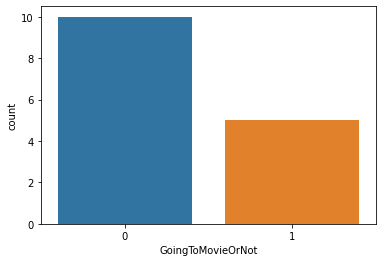

In [159]:
import seaborn as sns

#Get a count of the number of 'yes' & 'no' class
df['GoingToMovieOrNot'].value_counts()
#Visualize this count 
sns.countplot(df['GoingToMovieOrNot'],label="Count")

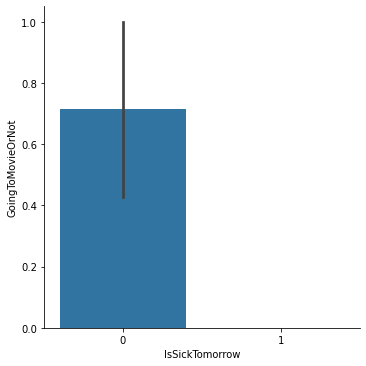

In [158]:
sns.catplot(data=df, kind="bar", x="IsSickTomorrow", y="GoingToMovieOrNot")

>__Above graph demonstrate this scenario, 
if x3 — IsSickTomorrow is equal to 1, then the output will always be 0. If I am not feeling well on the day of the movie then no matter whoever is the actor or director of the movie, I wouldn’t be going for a movie__ 

### Set the predictor and response variable

In [47]:
X = df.drop('GoingToMovieOrNot', axis = 1) # all except GoingToMovieOrNot
Y = df['GoingToMovieOrNot']

### Splitting using the magical function

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [133]:
X_train

,IsRainingTomorrow,IsScifiMovie,IsSickTomorrow,IsFriendsComing,IsDirectedByNolan
5,1,0,0,0,0
8,0,1,0,1,0
2,0,0,1,1,0
1,0,1,0,1,1
14,0,1,1,0,0
4,0,0,0,1,1
7,1,1,1,1,1
10,1,0,1,0,0
12,1,0,0,1,1
3,0,1,1,1,1


In [134]:
Y_train

5     0
8     1
2     0
1     1
14    0
4     1
7     0
10    0
12    1
3     0
6     1
Name: GoingToMovieOrNot, dtype: int64

In [135]:
X_test

,IsRainingTomorrow,IsScifiMovie,IsSickTomorrow,IsFriendsComing,IsDirectedByNolan
9,0,0,1,0,1
11,1,0,1,0,1
0,0,0,0,0,0
13,1,1,1,0,0


In [136]:
Y_test

9     0
11    0
0     0
13    0
Name: GoingToMovieOrNot, dtype: int64

### Naive bayes classification

In [145]:
# training the model on training set 

from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
  
# making predictions on the testing set 
predicted = gnb.predict(X_test) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
round(accuracy_score(Y_test, predicted)*100,2)

75.0

In [138]:
predicted

array([0, 0, 1, 0], dtype=int64)

In [139]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, predicted)
confusion_matrix

array([[3, 1],
       [0, 0]], dtype=int64)

### Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()  #h/w learn more about it

logit.fit(X_train, Y_train)

LogisticRegression()

In [141]:
Y_pred = logit.predict(X_test) 
Y_pred

array([0, 0, 0, 0], dtype=int64)

In [142]:
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test, Y_pred)*100,2)

100.0